# Bar Charts

In [1]:
from altair import *
population = load_dataset('population')

## Single bar chart

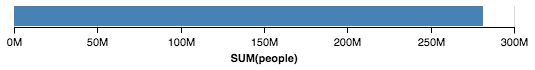

In [2]:
Chart(population).mark_bar().encode(
    x='sum(people)',
).transform_data(filter="datum.year==2000")

## Bar chart

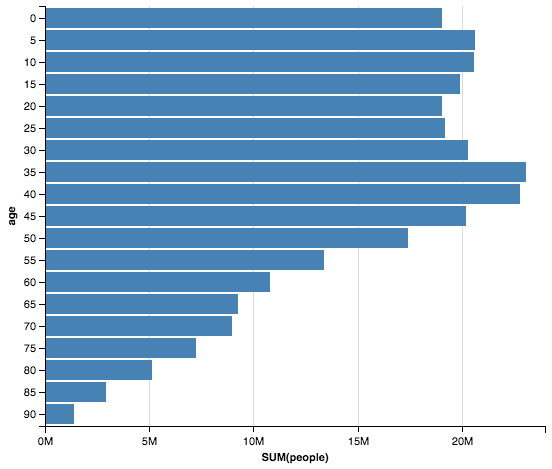

In [3]:
Chart(population).mark_bar().encode(
    x='sum(people)',
    y='age:O'
).transform_data(filter="datum.year==2000")

## Sorted bar chart featuring brewer color palette

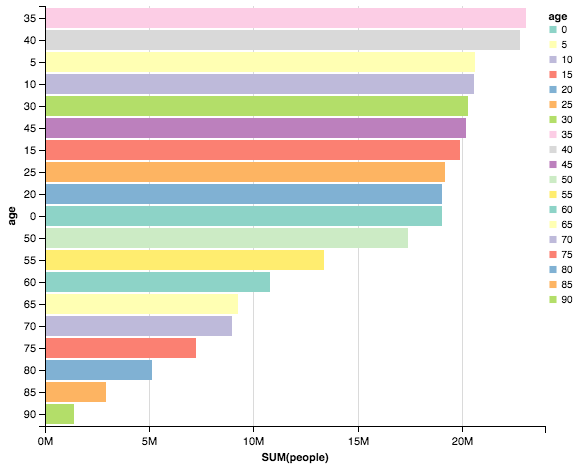

In [4]:
# https://jiffyclub.github.io/palettable/
from palettable import colorbrewer as cb

Chart(population).mark_bar().encode(
    x='sum(people)',
    y=Y('age:O', sort=SortField(field='people', order='descending', op='sum')),
    color=Color('age:N', scale=Scale(range=cb.qualitative.Set3_12.hex_colors))
).transform_data(filter="datum.year==2000")

## Pandas Series to sorted bar chart

In [5]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
data['counts'] = pd.Series(np.round(100 * np.abs(np.random.randn(8))))
data.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
data['title'] = data.index
data

,counts,title
a,71.0,a
b,86.0,b
c,97.0,c
d,177.0,d
e,4.0,e
f,90.0,f
g,42.0,g
h,24.0,h


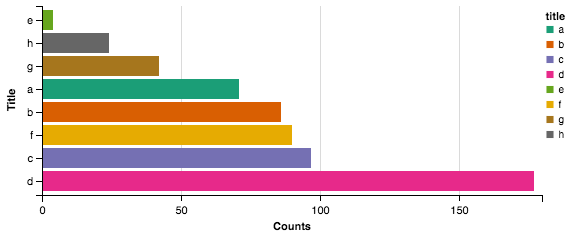

In [6]:
# using palettable imported above for the excellent brewer color palette
Chart(data).mark_bar().encode(
    x=X('counts', axis=Axis(title='Counts')),
    y=Y('title', sort=SortField(field='counts', order='ascending', op='sum'), axis=Axis(title='Title')),
    color=Color('title:N', scale=Scale(range=cb.qualitative.Dark2_8.hex_colors))
)

## Stacked bar chart

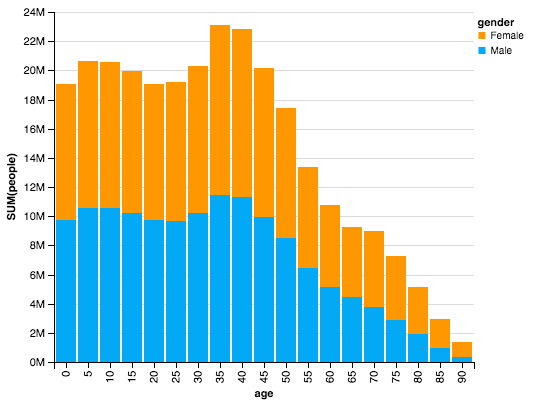

In [7]:
chart = Chart(population).mark_bar().encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"]))
).transform_data(
    filter='datum.year==2000',
    calculate=[Formula(field='gender', expr='datum.sex == 2 ? "Female" : "Male"')]
)
t = chart.transform # save the transform to re-use on later charts
chart

## Layered bar chart

Re-using the transform from above:

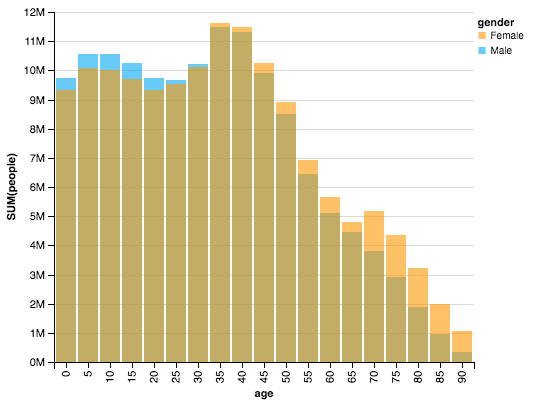

In [8]:
Chart(population, transform=t).mark_bar(
    opacity=0.6,
    stacked='none'
).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"]))
)

## Normalized stacked bar chart

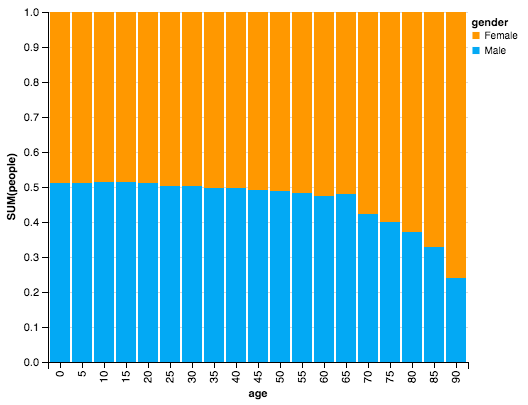

In [9]:
Chart(population, transform=t).mark_bar(
    stacked='normalize'
).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"]))
)

## Grouped bar chart

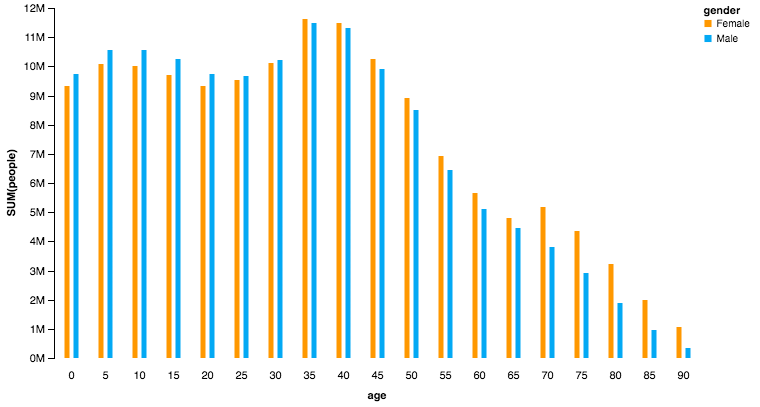

In [10]:
Chart(population, transform=t).mark_bar().encode(
    X('gender:N', axis=False, scale=Scale(bandSize=6)),
    Y('sum(people):Q', axis=Axis(grid=False)),
    Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"])),
    Column('age:O', axis=Axis(orient='bottom'))
).configure(
    facet=FacetConfig(cell=CellConfig(strokeWidth=0, height=250))
)

## Histogram

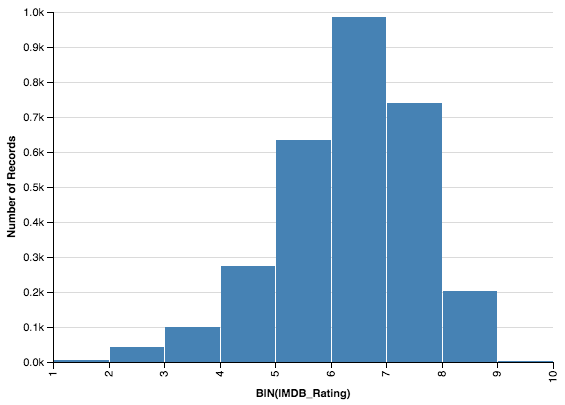

In [11]:
data = load_dataset('movies')
Chart(data).mark_bar().encode(
    x=X('IMDB_Rating', bin=Bin(maxbins=10)),
    y='count(*):Q',
)